In [ ]:
import numpy as np
import pandas as pd

#Pandas II

##Importing Data

In [ ]:
url = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-1.1-Data-Acquisition-Transfermarkt_BVB.csv"
df_bvb_player = pd.read_csv(url)

##Example: uFunc Unary Operation

In [ ]:
df_bvb_player.player_number

In [ ]:
def player_number_even(player_number):
  if player_number %2 == 0:
    return True
  else:
    return False

In [ ]:
#unary function on attribute
df_bvb_player.player_number.apply(player_number_even)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27     True
28    False
29     True
Name: player_number, dtype: bool

In [ ]:
#same as
df_bvb_player.player_number %2 == 0

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27     True
28    False
29     True
Name: player_number, dtype: bool

##Data Preprocessing

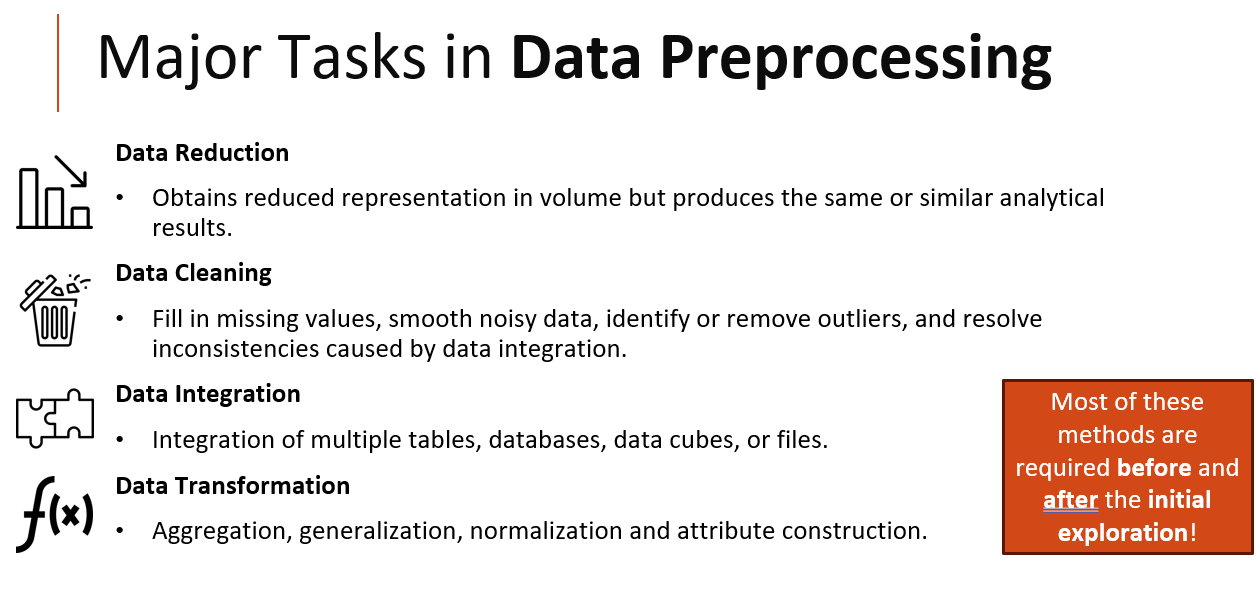

###Data Cleaning: smooth noisy data (Example I)

In [ ]:
def get_player_value_numeric(player_value):
    if(type(player_value) == float):
      return player_value
    else:
      player_value_arr = player_value.split(" ")
      #"150 Tsd. €".split(" ") --> ['150,00', 'Tsd.', '€']
      value = player_value_arr[0].replace(",",".")
      unit = 1000 if "Tsd." in player_value_arr[1] else 1000000
      return float(float(value)*unit)

In [ ]:
df_bvb_player.player_value

In [ ]:
(df_bvb_player.player_value.
apply(get_player_value_numeric))

###Data Cleaning: smooth noisy data (Example II)

In [ ]:
from datetime import date, timedelta, datetime

In [ ]:
#create sample date
date(2006, 1, 1)

datetime.date(2006, 1, 1)

In [ ]:
df_bvb_player.player_dob

In [ ]:
def get_player_dob_date(player_dob):
    if(type(player_dob) == datetime.date):
      return player_dob
    else:
      player_dob_arr = player_dob.split(" ")
      #"06.12.1997 (25)".split(" ") --> ['06.12.1997', '(25)']
      dob_arr = player_dob_arr[0].split(".")
      return date(int(dob_arr[2]), int(dob_arr[1]), int(dob_arr[0]))

In [ ]:
(df_bvb_player.player_dob.
apply(get_player_dob_date))

###Data Cleaning: smooth noisy data (Example III)

In [ ]:
def get_age(player_birth_date):
    return ((date.today() - player_birth_date)
            // timedelta(days=365.2425))


In [ ]:
(df_bvb_player.player_dob.
 apply(get_player_dob_date).
 apply(get_age))

##Data Cleaning Summary

In [ ]:
df_bvb_player["player_number_even"] = df_bvb_player.player_number.apply(player_number_even)

In [ ]:
df_bvb_player["player_value"] = df_bvb_player.player_value.apply(get_player_value_numeric)
df_bvb_player["player_dob"] = df_bvb_player.player_dob.apply(get_player_dob_date)
df_bvb_player["age"] = df_bvb_player.player_dob.apply(get_age)

In [ ]:
df_bvb_player.head()

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,1997-12-06,Schweiz,35000000.0,False,25
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,2001-05-25,Deutschland,1500000.0,False,22
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,1991-04-13,Deutschland,1000000.0,False,32
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,2003-11-19,Deutschland,150000.0,False,19
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,True,23


In [ ]:
df_bvb_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           30 non-null     object 
 1   club_league         30 non-null     object 
 2   player_position     30 non-null     object 
 3   player_number       30 non-null     int64  
 4   player_name         30 non-null     object 
 5   player_dob          30 non-null     object 
 6   player_country      30 non-null     object 
 7   player_value        30 non-null     float64
 8   player_number_even  30 non-null     bool   
 9   age                 30 non-null     int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.3+ KB


In [ ]:
df_bvb_player

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,1997-12-06,Schweiz,35000000.0,False,25
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,2001-05-25,Deutschland,1500000.0,False,22
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,1991-04-13,Deutschland,1000000.0,False,32
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,2003-11-19,Deutschland,150000.0,False,19
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,True,23
5,Borussia Dortmund,Bundesliga,Abwehr,25,Niklas Süle,1995-09-03,Deutschland,35000000.0,False,28
6,Borussia Dortmund,Bundesliga,Abwehr,15,Mats Hummels,1988-12-16,Deutschland,6000000.0,False,34
7,Borussia Dortmund,Bundesliga,Abwehr,44,Soumaïla Coulibaly,2003-10-14,Frankreich,1000000.0,True,19
8,Borussia Dortmund,Bundesliga,Abwehr,47,Antonios Papadopoulos,1999-09-10,Deutschland,600000.0,False,24
9,Borussia Dortmund,Bundesliga,Abwehr,5,Ramy Bensebaini,1995-04-16,Algerien,20000000.0,False,28


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_bvb_player, *['player_number'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_bvb_player, *['player_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_bvb_player, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_bvb_player, *['player_number'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_bvb_player, *['player_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_bvb_player, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_bvb_player, *['player_position'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_bvb_player, *['player_number_even'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_bvb_player, *[[['player_number', 'player_value'], ['player_value', 'age']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_bvb_player, *['player_position', 'player_number_even'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_bvb_player, *['player_number', 'player_position'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_bvb_player, *['player_number', 'player_number_even'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_bvb_player, *['player_value', 'player_position'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_bvb_player, *['player_value', 'player_number_even'], **{'inner': 'stick'})
chart

In [ ]:
df_bvb_player.describe()

,player_number,player_value,age
count,30.000000,3.000000e+01,30.000000
mean,20.300000,1.540500e+07,24.866667
std,12.809345,1.368692e+07,4.953113
min,1.000000,1.500000e+05,17.000000
25%,9.250000,2.375000e+06,21.250000
50%,19.500000,1.300000e+07,24.500000
75%,29.250000,2.725000e+07,28.750000
max,47.000000,4.000000e+07,34.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['player_number'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['player_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['player_number'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['player_value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['player_number', 'player_value'], ['player_value', 'age']]], **{})
chart

### Data Output

In [ ]:
url = r"/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/"
file_name = "FHDTM-P2DS-WS2324-Project-Demo-2.0-Data-Preprocessing-Transfermarkt_BVB.csv"
df_bvb_player.to_csv(url+file_name, index=False)

In [ ]:
url2 = r"/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/GIT FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/"
df_bvb_player.to_csv(url2+file_name, index=False)

##Training #1

In [ ]:
url_git = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-2.0-Data-Preprocessing-Transfermarkt_BVB.csv"

In [ ]:
df_bvb_player = pd.read_csv(url_git)

###Part 1

In [ ]:
from datetime import date, timedelta, datetime

In [ ]:
df_bvb_player.columns

Index(['club_name', 'club_league', 'player_position', 'player_number',
       'player_name', 'player_dob', 'player_country', 'player_value',
       'player_number_even', 'age'],
      dtype='object')

###Part 2

###Part 3

### Data Output

In [ ]:
url = r"/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/"
file_name = "FHDTM-P2DS-WS2324-Project-Demo-2.1-Data-Preprocessing-Transfermarkt_BVB.csv"
df_bvb_player.to_csv(url+file_name, index=False)

In [ ]:
url2 = r"/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/GIT FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/"
df_bvb_player.to_csv(url2+file_name, index=False)

##Data Preprocessing

In [ ]:
url_git = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-2.1-Data-Preprocessing-Transfermarkt_BVB.csv"

In [ ]:
df_bvb_player = pd.read_csv(url_git)

### Data Cleaning: missing data

In [ ]:
df_bvb_player.isnull()

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

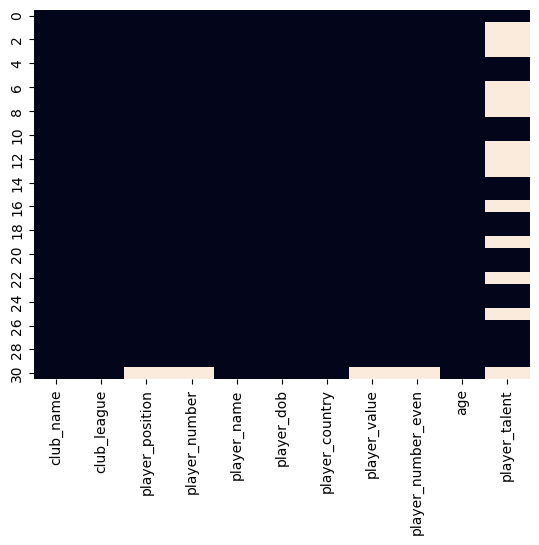

In [ ]:
plt.figure()
sns.heatmap((df_bvb_player.isnull()), cbar=False)

In [ ]:
df_bvb_player.dropna()

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent
0,Borussia Dortmund,Bundesliga,Torwart,1.0,Gregor Kobel,1997-12-06,Schweiz,35000000.0,0.0,25,Star
4,Borussia Dortmund,Bundesliga,Abwehr,4.0,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,1.0,23,Star
5,Borussia Dortmund,Bundesliga,Abwehr,25.0,Niklas Süle,1995-09-03,Deutschland,35000000.0,0.0,28,Star
9,Borussia Dortmund,Bundesliga,Abwehr,5.0,Ramy Bensebaini,1995-04-16,Algerien,20000000.0,0.0,28,Star
10,Borussia Dortmund,Bundesliga,Abwehr,26.0,Julian Ryerson,1997-11-17,Norwegen,13000000.0,1.0,25,Star
14,Borussia Dortmund,Bundesliga,Mittelfeld,23.0,Emre Can,1994-01-12,Deutschland,14000000.0,0.0,29,Star
15,Borussia Dortmund,Bundesliga,Mittelfeld,6.0,Salih Özcan,1998-01-11,Türkei,13000000.0,1.0,25,Star
17,Borussia Dortmund,Bundesliga,Mittelfeld,20.0,Marcel Sabitzer,1994-03-17,Österreich,20000000.0,1.0,29,Star
18,Borussia Dortmund,Bundesliga,Mittelfeld,8.0,Felix Nmecha,2000-10-10,Deutschland,15000000.0,1.0,22,Star
20,Borussia Dortmund,Bundesliga,Mittelfeld,19.0,Julian Brandt,1996-05-02,Deutschland,40000000.0,0.0,27,Star


In [ ]:
df_bvb_player.fillna("No Category")

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent
0,Borussia Dortmund,Bundesliga,Torwart,1.0,Gregor Kobel,1997-12-06,Schweiz,35000000.0,0.0,25,Star
1,Borussia Dortmund,Bundesliga,Torwart,35.0,Marcel Lotka,2001-05-25,Deutschland,1500000.0,0.0,22,No Category
2,Borussia Dortmund,Bundesliga,Torwart,33.0,Alexander Meyer,1991-04-13,Deutschland,1000000.0,0.0,32,No Category
3,Borussia Dortmund,Bundesliga,Torwart,31.0,Silas Ostrzinski,2003-11-19,Deutschland,150000.0,0.0,19,No Category
4,Borussia Dortmund,Bundesliga,Abwehr,4.0,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,1.0,23,Star
5,Borussia Dortmund,Bundesliga,Abwehr,25.0,Niklas Süle,1995-09-03,Deutschland,35000000.0,0.0,28,Star
6,Borussia Dortmund,Bundesliga,Abwehr,15.0,Mats Hummels,1988-12-16,Deutschland,6000000.0,0.0,34,No Category
7,Borussia Dortmund,Bundesliga,Abwehr,44.0,Soumaïla Coulibaly,2003-10-14,Frankreich,1000000.0,1.0,19,No Category
8,Borussia Dortmund,Bundesliga,Abwehr,47.0,Antonios Papadopoulos,1999-09-10,Deutschland,600000.0,0.0,24,No Category
9,Borussia Dortmund,Bundesliga,Abwehr,5.0,Ramy Bensebaini,1995-04-16,Algerien,20000000.0,0.0,28,Star


In [ ]:
df_bvb_player.player_talent.fillna("No Category")

0            Star
1     No Category
2     No Category
3     No Category
4            Star
5            Star
6     No Category
7     No Category
8     No Category
9            Star
10           Star
11    No Category
12    No Category
13    No Category
14           Star
15           Star
16    No Category
17           Star
18           Star
19    No Category
20           Star
21    Rising Star
22    No Category
23    Rising Star
24    Rising Star
25    No Category
26           Star
27    Rising Star
28           Star
29    Rising Star
30    No Category
Name: player_talent, dtype: object

In [ ]:
df_bvb_player.player_talent

0            Star
1             NaN
2             NaN
3             NaN
4            Star
5            Star
6             NaN
7             NaN
8             NaN
9            Star
10           Star
11            NaN
12            NaN
13            NaN
14           Star
15           Star
16            NaN
17           Star
18           Star
19            NaN
20           Star
21    Rising Star
22            NaN
23    Rising Star
24    Rising Star
25            NaN
26           Star
27    Rising Star
28           Star
29    Rising Star
30            NaN
Name: player_talent, dtype: object

In [ ]:
df_bvb_player.player_talent.fillna(method="ffill")

0            Star
1            Star
2            Star
3            Star
4            Star
5            Star
6            Star
7            Star
8            Star
9            Star
10           Star
11           Star
12           Star
13           Star
14           Star
15           Star
16           Star
17           Star
18           Star
19           Star
20           Star
21    Rising Star
22    Rising Star
23    Rising Star
24    Rising Star
25    Rising Star
26           Star
27    Rising Star
28           Star
29    Rising Star
30    Rising Star
Name: player_talent, dtype: object

In [ ]:
df_bvb_player.player_talent.fillna(method="bfill")

0            Star
1            Star
2            Star
3            Star
4            Star
5            Star
6            Star
7            Star
8            Star
9            Star
10           Star
11           Star
12           Star
13           Star
14           Star
15           Star
16           Star
17           Star
18           Star
19           Star
20           Star
21    Rising Star
22    Rising Star
23    Rising Star
24    Rising Star
25           Star
26           Star
27    Rising Star
28           Star
29    Rising Star
30            NaN
Name: player_talent, dtype: object

###Data Integration/Cleaning: remove duplicates

In [ ]:
url_git_top_100_clubs_and_players = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-1.2-Data-Acquisition-Transfermarkt_Top_100.csv"

In [ ]:
df_top_100_clubs_and_players = pd.read_csv(url_git_top_100_clubs_and_players)

In [ ]:
df_top_100_clubs = df_top_100_clubs_and_players.drop(columns=["player_position","player_number","player_name","player_dob","player_country","player_value"])

In [ ]:
df_top_100_clubs

,club_name,club_number_player,club_avg_age,club_league,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance
0,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
1,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
2,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
3,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
4,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
...,...,...,...,...,...,...,...,...,...
2937,AZ Alkmaar,31,"23,0",Eredivisie,12,6,AFAS Stadion,19.478 Plätze,"+36,17 Mio. €"
2938,AZ Alkmaar,31,"23,0",Eredivisie,12,6,AFAS Stadion,19.478 Plätze,"+36,17 Mio. €"
2939,AZ Alkmaar,31,"23,0",Eredivisie,12,6,AFAS Stadion,19.478 Plätze,"+36,17 Mio. €"
2940,AZ Alkmaar,31,"23,0",Eredivisie,12,6,AFAS Stadion,19.478 Plätze,"+36,17 Mio. €"


In [ ]:
df_top_100_clubs.drop_duplicates()

,club_name,club_number_player,club_avg_age,club_league,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance
0,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
27,FC Arsenal,33,"24,7",Premier League,24,22,Emirates Stadium,60.704 Plätze,"-197,75 Mio. €"
60,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €"
99,Real Madrid,24,"26,7",LaLiga,16,19,Santiago Bernabéu,81.044 Plätze,"-124,50 Mio. €"
123,FC Chelsea,30,"23,8",Premier League,19,18,Stamford Bridge,40.853 Plätze,"+46,90 Mio. €"
...,...,...,...,...,...,...,...,...,...
2782,Spartak Moskau,30,"24,7",Premier Liga,10,13,Otkrytie Bank Arena,44.571 Plätze,"-15,00 Mio. €"
2812,Stade Reims,31,"24,3",Ligue 1,23,10,Stade Auguste-Delaune,21.684 Plätze,"+6,05 Mio. €"
2843,CA Paranaense,34,"25,3",Campeonato Brasileiro Série A,7,4,Arena da Baixada,42.372 Plätze,"+6,30 Mio. €"
2877,Trabzonspor,34,"25,1",Süper Lig,15,13,Papara Park,40.782 Plätze,"-4,57 Mio. €"


In [ ]:
df_top_100_clubs.drop_duplicates().reset_index(drop=True)

,club_name,club_number_player,club_avg_age,club_league,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance
0,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
1,FC Arsenal,33,"24,7",Premier League,24,22,Emirates Stadium,60.704 Plätze,"-197,75 Mio. €"
2,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €"
3,Real Madrid,24,"26,7",LaLiga,16,19,Santiago Bernabéu,81.044 Plätze,"-124,50 Mio. €"
4,FC Chelsea,30,"23,8",Premier League,19,18,Stamford Bridge,40.853 Plätze,"+46,90 Mio. €"
...,...,...,...,...,...,...,...,...,...
95,Spartak Moskau,30,"24,7",Premier Liga,10,13,Otkrytie Bank Arena,44.571 Plätze,"-15,00 Mio. €"
96,Stade Reims,31,"24,3",Ligue 1,23,10,Stade Auguste-Delaune,21.684 Plätze,"+6,05 Mio. €"
97,CA Paranaense,34,"25,3",Campeonato Brasileiro Série A,7,4,Arena da Baixada,42.372 Plätze,"+6,30 Mio. €"
98,Trabzonspor,34,"25,1",Süper Lig,15,13,Papara Park,40.782 Plätze,"-4,57 Mio. €"


In [ ]:
df_top_100_clubs = df_top_100_clubs.drop_duplicates().reset_index(drop=True)

#### Data Output

In [ ]:
url = r"/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/"
file_name = "FHDTM-P2DS-WS2324-Project-Demo-2.0-Data-Preprocessing-Transfermarkt_Top_100_Clubs.csv"
df_top_100_clubs.to_csv(url+file_name, index=False)

In [ ]:
url2 = r"/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/GIT FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/"
df_top_100_clubs.to_csv(url2+file_name, index=False)

###Data Integration: merge (join)

In [ ]:
url_git = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-2.0-Data-Preprocessing-Transfermarkt_Top_100_Clubs.csv"

In [ ]:
df_top_100_clubs = pd.read_csv(url_git)

In [ ]:
df_top_100_clubs

,club_name,club_number_player,club_avg_age,club_league,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance
0,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €"
1,FC Arsenal,33,"24,7",Premier League,24,22,Emirates Stadium,60.704 Plätze,"-197,75 Mio. €"
2,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €"
3,Real Madrid,24,"26,7",LaLiga,16,19,Santiago Bernabéu,81.044 Plätze,"-124,50 Mio. €"
4,FC Chelsea,30,"23,8",Premier League,19,18,Stamford Bridge,40.853 Plätze,"+46,90 Mio. €"
...,...,...,...,...,...,...,...,...,...
95,Spartak Moskau,30,"24,7",Premier Liga,10,13,Otkrytie Bank Arena,44.571 Plätze,"-15,00 Mio. €"
96,Stade Reims,31,"24,3",Ligue 1,23,10,Stade Auguste-Delaune,21.684 Plätze,"+6,05 Mio. €"
97,CA Paranaense,34,"25,3",Campeonato Brasileiro Série A,7,4,Arena da Baixada,42.372 Plätze,"+6,30 Mio. €"
98,Trabzonspor,34,"25,1",Süper Lig,15,13,Papara Park,40.782 Plätze,"-4,57 Mio. €"


In [ ]:
df_bvb_player

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent
0,Borussia Dortmund,Bundesliga,Torwart,1.0,Gregor Kobel,1997-12-06,Schweiz,35000000.0,0.0,25,Star
1,Borussia Dortmund,Bundesliga,Torwart,35.0,Marcel Lotka,2001-05-25,Deutschland,1500000.0,0.0,22,NaN
2,Borussia Dortmund,Bundesliga,Torwart,33.0,Alexander Meyer,1991-04-13,Deutschland,1000000.0,0.0,32,NaN
3,Borussia Dortmund,Bundesliga,Torwart,31.0,Silas Ostrzinski,2003-11-19,Deutschland,150000.0,0.0,19,NaN
4,Borussia Dortmund,Bundesliga,Abwehr,4.0,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,1.0,23,Star
5,Borussia Dortmund,Bundesliga,Abwehr,25.0,Niklas Süle,1995-09-03,Deutschland,35000000.0,0.0,28,Star
6,Borussia Dortmund,Bundesliga,Abwehr,15.0,Mats Hummels,1988-12-16,Deutschland,6000000.0,0.0,34,NaN
7,Borussia Dortmund,Bundesliga,Abwehr,44.0,Soumaïla Coulibaly,2003-10-14,Frankreich,1000000.0,1.0,19,NaN
8,Borussia Dortmund,Bundesliga,Abwehr,47.0,Antonios Papadopoulos,1999-09-10,Deutschland,600000.0,0.0,24,NaN
9,Borussia Dortmund,Bundesliga,Abwehr,5.0,Ramy Bensebaini,1995-04-16,Algerien,20000000.0,0.0,28,Star


In [ ]:
pd.merge(df_bvb_player, df_top_100_clubs, how="inner", on="club_name")

,club_name,club_league_x,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent,club_number_player,club_avg_age,club_league_y,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance
0,Borussia Dortmund,Bundesliga,Torwart,1.0,Gregor Kobel,1997-12-06,Schweiz,35000000.0,0.0,25,Star,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
1,Borussia Dortmund,Bundesliga,Torwart,35.0,Marcel Lotka,2001-05-25,Deutschland,1500000.0,0.0,22,NaN,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
2,Borussia Dortmund,Bundesliga,Torwart,33.0,Alexander Meyer,1991-04-13,Deutschland,1000000.0,0.0,32,NaN,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
3,Borussia Dortmund,Bundesliga,Torwart,31.0,Silas Ostrzinski,2003-11-19,Deutschland,150000.0,0.0,19,NaN,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
4,Borussia Dortmund,Bundesliga,Abwehr,4.0,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,1.0,23,Star,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
5,Borussia Dortmund,Bundesliga,Abwehr,25.0,Niklas Süle,1995-09-03,Deutschland,35000000.0,0.0,28,Star,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
6,Borussia Dortmund,Bundesliga,Abwehr,15.0,Mats Hummels,1988-12-16,Deutschland,6000000.0,0.0,34,NaN,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
7,Borussia Dortmund,Bundesliga,Abwehr,44.0,Soumaïla Coulibaly,2003-10-14,Frankreich,1000000.0,1.0,19,NaN,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
8,Borussia Dortmund,Bundesliga,Abwehr,47.0,Antonios Papadopoulos,1999-09-10,Deutschland,600000.0,0.0,24,NaN,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"
9,Borussia Dortmund,Bundesliga,Abwehr,5.0,Ramy Bensebaini,1995-04-16,Algerien,20000000.0,0.0,28,Star,30,"24,8",Bundesliga,15,18,SIGNAL IDUNA PARK,81.365 Plätze,"+59,35 Mio. €"


###Data Integration: append rows with identical columns

In [ ]:
df_psg_player = df_top_100_clubs_and_players[["club_name","club_league","player_position","player_number","player_name","player_dob","player_country","player_value"]]

In [ ]:
df_psg_player = df_psg_player[df_psg_player.club_name=="FC Paris Saint-Germain"].reset_index(drop=True)

In [ ]:
df_psg_player

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,FC Paris Saint-Germain,Ligue 1,Torwart,99,Gianluigi Donnarumma,25.02.1999 (24),Italien,"45,00 Mio. €"
1,FC Paris Saint-Germain,Ligue 1,Torwart,40,Arnau Tenas,30.05.2001 (22),Spanien,"5,00 Mio. €"
2,FC Paris Saint-Germain,Ligue 1,Torwart,1,Keylor Navas,15.12.1986 (36),Costa Rica,"4,00 Mio. €"
3,FC Paris Saint-Germain,Ligue 1,Torwart,16,Sergio Rico,01.09.1993 (29),Spanien,"3,00 Mio. €"
4,FC Paris Saint-Germain,Ligue 1,Torwart,30,Alexandre Letellier,11.12.1990 (32),Frankreich,300 Tsd. €
5,FC Paris Saint-Germain,Ligue 1,Abwehr,5,Marquinhos,14.05.1994 (29),Brasilien,"65,00 Mio. €"
6,FC Paris Saint-Germain,Ligue 1,Abwehr,37,Milan Skriniar,11.02.1995 (28),Slowakei,"50,00 Mio. €"
7,FC Paris Saint-Germain,Ligue 1,Abwehr,21,Lucas Hernández,14.02.1996 (27),Frankreich,"45,00 Mio. €"
8,FC Paris Saint-Germain,Ligue 1,Abwehr,3,Presnel Kimpembe,13.08.1995 (27),Frankreich,"28,00 Mio. €"
9,FC Paris Saint-Germain,Ligue 1,Abwehr,22,Abdou Diallo,04.05.1996 (27),Senegal,"10,00 Mio. €"


In [ ]:
df_bvb_player

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent
0,Borussia Dortmund,Bundesliga,Torwart,1.0,Gregor Kobel,1997-12-06,Schweiz,35000000.0,0.0,25,Star
1,Borussia Dortmund,Bundesliga,Torwart,35.0,Marcel Lotka,2001-05-25,Deutschland,1500000.0,0.0,22,NaN
2,Borussia Dortmund,Bundesliga,Torwart,33.0,Alexander Meyer,1991-04-13,Deutschland,1000000.0,0.0,32,NaN
3,Borussia Dortmund,Bundesliga,Torwart,31.0,Silas Ostrzinski,2003-11-19,Deutschland,150000.0,0.0,19,NaN
4,Borussia Dortmund,Bundesliga,Abwehr,4.0,Nico Schlotterbeck,1999-12-01,Deutschland,40000000.0,1.0,23,Star
5,Borussia Dortmund,Bundesliga,Abwehr,25.0,Niklas Süle,1995-09-03,Deutschland,35000000.0,0.0,28,Star
6,Borussia Dortmund,Bundesliga,Abwehr,15.0,Mats Hummels,1988-12-16,Deutschland,6000000.0,0.0,34,NaN
7,Borussia Dortmund,Bundesliga,Abwehr,44.0,Soumaïla Coulibaly,2003-10-14,Frankreich,1000000.0,1.0,19,NaN
8,Borussia Dortmund,Bundesliga,Abwehr,47.0,Antonios Papadopoulos,1999-09-10,Deutschland,600000.0,0.0,24,NaN
9,Borussia Dortmund,Bundesliga,Abwehr,5.0,Ramy Bensebaini,1995-04-16,Algerien,20000000.0,0.0,28,Star


In [ ]:
pd.concat([df_psg_player, df_bvb_player], ignore_index=True)[25:45]

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,player_number_even,age,player_talent
25,FC Paris Saint-Germain,Ligue 1,Mittelfeld,33,Warren Zaïre-Emery,08.03.2006 (17),Frankreich,"20,00 Mio. €",NaN,NaN,NaN
26,FC Paris Saint-Germain,Ligue 1,Mittelfeld,18,Renato Sanches,18.08.1997 (25),Portugal,"15,00 Mio. €",NaN,NaN,NaN
27,FC Paris Saint-Germain,Ligue 1,Mittelfeld,-,Georginio Wijnaldum,11.11.1990 (32),Niederlande,"8,00 Mio. €",NaN,NaN,NaN
28,FC Paris Saint-Germain,Ligue 1,Mittelfeld,38,Edouard Michut,04.03.2003 (20),Frankreich,"2,50 Mio. €",NaN,NaN,NaN
29,FC Paris Saint-Germain,Ligue 1,Mittelfeld,27,Cher Ndour,27.07.2004 (19),Italien,"1,50 Mio. €",NaN,NaN,NaN
30,FC Paris Saint-Germain,Ligue 1,Mittelfeld,19,Kang-in Lee,19.02.2001 (22),Südkorea,"22,00 Mio. €",NaN,NaN,NaN
31,FC Paris Saint-Germain,Ligue 1,Mittelfeld,35,Ismaël Gharbi,10.04.2004 (19),Spanien,"5,00 Mio. €",NaN,NaN,NaN
32,FC Paris Saint-Germain,Ligue 1,Sturm,10,Neymar,05.02.1992 (31),Brasilien,"60,00 Mio. €",NaN,NaN,NaN
33,FC Paris Saint-Germain,Ligue 1,Sturm,34,Julian Draxler,20.09.1993 (29),Deutschland,"6,00 Mio. €",NaN,NaN,NaN
34,FC Paris Saint-Germain,Ligue 1,Sturm,11,Marco Asensio,21.01.1996 (27),Spanien,"25,00 Mio. €",NaN,NaN,NaN


###Data Transformation: attribute construction

In [ ]:
#unary example
def player_number_even(player_number):
  if player_number %2 == 0:
    return True
  else:
    return False

In [ ]:
#unary function on attribute
df_bvb_player.player_number.apply(player_number_even)

In [ ]:
#lambda example
x = lambda a : a + 1
print(x(5))         #Prints "6"

x = lambda a, b : a * b
print(x(5, 4))      #Prints "20"

x = lambda a, b, c : a + b + c
print(x(5, 4, 3))   #Prints "12"

6
20
12


In [ ]:
#binary example
def player_talent(player_value, age):
  if (player_value > 1000000) and (age <= 21):
    return "Rising Star"
  elif player_value > 10000000:
    return "Star"
  else:
    return "No Category"

In [ ]:
df_bvb_player.player_value

0     35000000.0
1      1500000.0
2      1000000.0
3       150000.0
4     40000000.0
5     35000000.0
6      6000000.0
7      1000000.0
8       600000.0
9     20000000.0
10    13000000.0
11    10000000.0
12     5000000.0
13     1000000.0
14    14000000.0
15    13000000.0
16     1000000.0
17    20000000.0
18    15000000.0
19      400000.0
20    40000000.0
21    25000000.0
22     7000000.0
23    46000000.0
24    16100000.0
25     8050000.0
26    32200000.0
27     9775000.0
28    34500000.0
29    34500000.0
30           NaN
Name: player_value, dtype: float64

In [ ]:
df_bvb_player.age

0     25
1     22
2     32
3     19
4     23
5     28
6     34
7     19
8     24
9     28
10    25
11    28
12    32
13    23
14    29
15    25
16    18
17    29
18    22
19    22
20    27
21    20
22    34
23    21
24    19
25    30
26    24
27    17
28    29
29    18
30    23
Name: age, dtype: int64

In [ ]:
df_bvb_player.apply(lambda x: player_talent(x.player_value, x.age), axis=1)

0            Star
1     No Category
2     No Category
3     No Category
4            Star
5            Star
6     No Category
7     No Category
8     No Category
9            Star
10           Star
11    No Category
12    No Category
13    No Category
14           Star
15           Star
16    No Category
17           Star
18           Star
19    No Category
20           Star
21    Rising Star
22    No Category
23    Rising Star
24    Rising Star
25    No Category
26           Star
27    Rising Star
28           Star
29    Rising Star
30    No Category
dtype: object

####Training #2

In [ ]:
url_git = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-2.0-Data-Preprocessing-Transfermarkt_Top_100_Clubs.csv"

In [ ]:
df_top_100_clubs = pd.read_csv(url_git)

###Data Transformation: aggregation

In [ ]:
df_bvb_player.count()

club_name             31
club_league           31
player_position       30
player_number         30
player_name           31
player_dob            31
player_country        31
player_value          30
player_number_even    30
age                   31
player_talent         17
dtype: int64

In [ ]:
df_bvb_player.player_value.sum()

485775000.0

In [ ]:
df_bvb_player.player_value.mean()

16192500.0

In [ ]:
df_bvb_player.player_value.median()

13000000.0

In [ ]:
df_bvb_player.player_value.std()

14548117.47212534

In [ ]:
df_bvb_player.age.sum()

769

In [ ]:
df_bvb_player.age.mean()

24.806451612903224

In [ ]:
df_bvb_player.age.median()

24.0

In [ ]:
df_bvb_player.age.std()

4.881388838153268

In [ ]:
import matplotlib.pyplot as plt

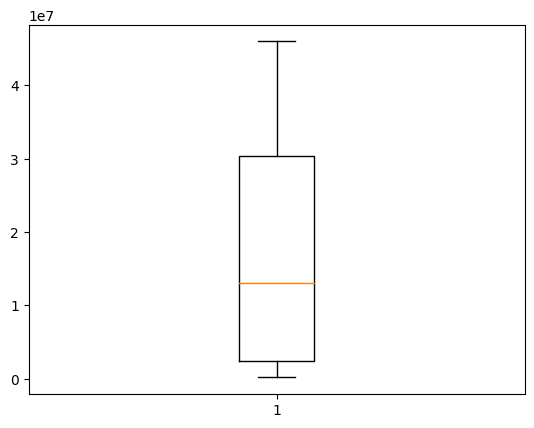

In [ ]:
fig = plt.figure()
plt.boxplot(df_bvb_player.player_value.dropna().values)
plt.show()

###Data Transformation: grouping and aggregation

In [ ]:
df_bvb_player[["player_position","age"]]

,player_position,age
0,Torwart,25
1,Torwart,22
2,Torwart,32
3,Torwart,19
4,Abwehr,23
5,Abwehr,28
6,Abwehr,34
7,Abwehr,19
8,Abwehr,24
9,Abwehr,28


In [ ]:
df_bvb_player.groupby("player_position")["age"].mean()

player_position
Abwehr        26.400000
Mittelfeld    25.111111
Sturm         22.571429
Torwart       24.500000
Name: age, dtype: float64

####Training #3

In [ ]:
url_git = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/FHDTM-P2DS-WS2324-Project-Demo-2.0-Data-Preprocessing-Transfermarkt_Top_100_Clubs.csv"

In [ ]:
df_top_100_clubs = pd.read_csv(url_git)

#####Part 1

#####Part 2

###Data Transformation: generalization

In [ ]:
#example player_talent or is_even

###Data Transformation: normalization

In [ ]:
df_top_100_clubs

,club_name,club_number_player,club_avg_age,club_league,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance
0,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55017,-79100000.0
1,FC Arsenal,33,"24,7",Premier League,24,22,Emirates Stadium,60704,-197750000.0
2,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49691,-128000000.0
3,Real Madrid,24,"26,7",LaLiga,16,19,Santiago Bernabéu,81044,-124500000.0
4,FC Chelsea,30,"23,8",Premier League,19,18,Stamford Bridge,40853,46900000.0
...,...,...,...,...,...,...,...,...,...
95,Spartak Moskau,30,"24,7",Premier Liga,10,13,Otkrytie Bank Arena,44571,-15000000.0
96,Stade Reims,31,"24,3",Ligue 1,23,10,Stade Auguste-Delaune,21684,6050000.0
97,CA Paranaense,34,"25,3",Campeonato Brasileiro Série A,7,4,Arena da Baixada,42372,6300000.0
98,Trabzonspor,34,"25,1",Süper Lig,15,13,Papara Park,40782,-4570000.0


<Axes: >

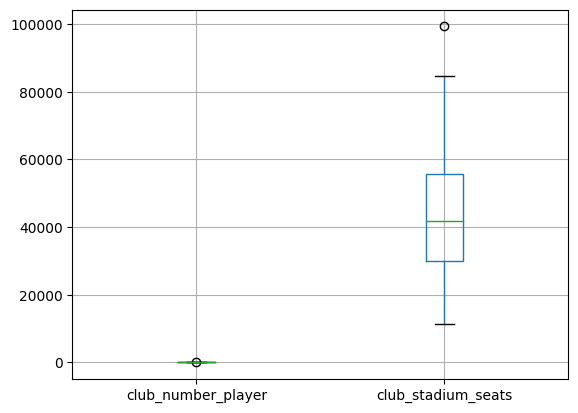

In [ ]:
df_top_100_clubs[["club_number_player", "club_stadium_seats"]].boxplot()

<Axes: >

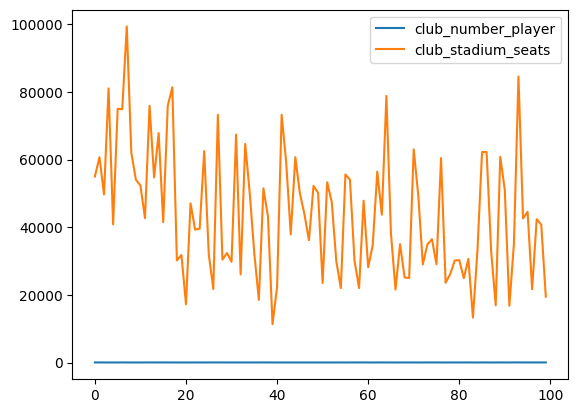

In [ ]:
df_top_100_clubs[["club_number_player", "club_stadium_seats"]].plot()

In [ ]:
min = df_top_100_clubs.club_number_player.min()
print(min)
max = df_top_100_clubs.club_number_player.max()
print(max)
df_top_100_clubs["club_number_player_scaled"] = (df_top_100_clubs.club_number_player - min) / (max - min)

22
43


In [ ]:
min = df_top_100_clubs.club_stadium_seats.min()
print(min)
max = df_top_100_clubs.club_stadium_seats.max()
print(max)
df_top_100_clubs["club_stadium_seats_scaled"] = (df_top_100_clubs.club_stadium_seats - min) / (max - min)

11329
99354


<Axes: >

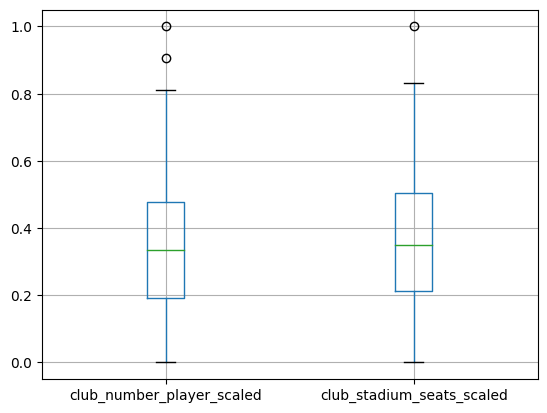

In [ ]:
df_top_100_clubs[["club_number_player_scaled", "club_stadium_seats_scaled"]].boxplot()

<Axes: >

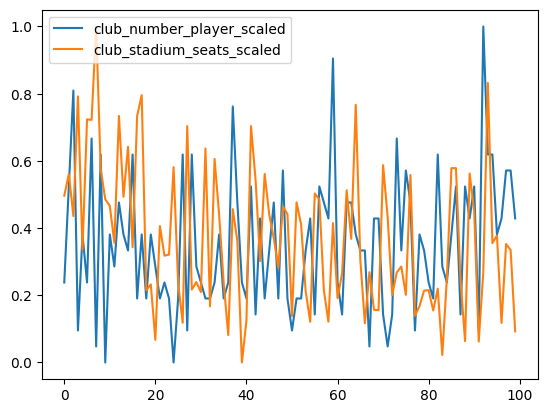

In [ ]:
df_top_100_clubs[["club_number_player_scaled", "club_stadium_seats_scaled"]].plot()

###Data Transformation: scaling with map

In [ ]:
df_bvb_player.player_position

0        Torwart
1        Torwart
2        Torwart
3        Torwart
4         Abwehr
5         Abwehr
6         Abwehr
7         Abwehr
8         Abwehr
9         Abwehr
10        Abwehr
11        Abwehr
12        Abwehr
13        Abwehr
14    Mittelfeld
15    Mittelfeld
16    Mittelfeld
17    Mittelfeld
18    Mittelfeld
19    Mittelfeld
20    Mittelfeld
21    Mittelfeld
22    Mittelfeld
23         Sturm
24         Sturm
25         Sturm
26         Sturm
27         Sturm
28         Sturm
29         Sturm
Name: player_position, dtype: object

In [ ]:
df_bvb_player.player_position.map(
    {'Torwart': 1, 'Abwehr': 2, 'Mittelfeld': 3, 'Sturm':4, np.NaN:0}
    )

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: player_position, dtype: int64